# Simulation 1 - Plotting

Vivek Gopalakrishnan | July 8, 2019

Visualize the simulation results using high-quality `Seaborn` relplots.

In [1]:
import glob
import re

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Sample size vs Power

In [2]:
dfs = []

for file in glob.glob("results/power/m*.csv"):
    
    # Get the sample size
    sample_size = re.split("[//m.]", file)[3]
    
    # Read csv and add sample_size as column
    df = pd.read_csv(file)
    df["m"] = int(sample_size)
    dfs.append(df)

# Combine dfs in to a single DataFrame
df = pd.concat(dfs)

# Organize the dataframe
df = df.sort_values(by=["m", "$p_{ij}$",])
df = df.drop("Unnamed: 0", axis=1)
df = df.reset_index(drop="True")

# Look at the final result
print(df.shape)
df.head()

(3000, 4)


,$p_{ij}$,test,power,m
0,0.001000,t-test,0.003,10
1,0.001000,mann-whitney,0.011,10
2,0.001000,fisher,0.000,10
3,0.011081,t-test,0.002,10
4,0.011081,mann-whitney,0.022,10


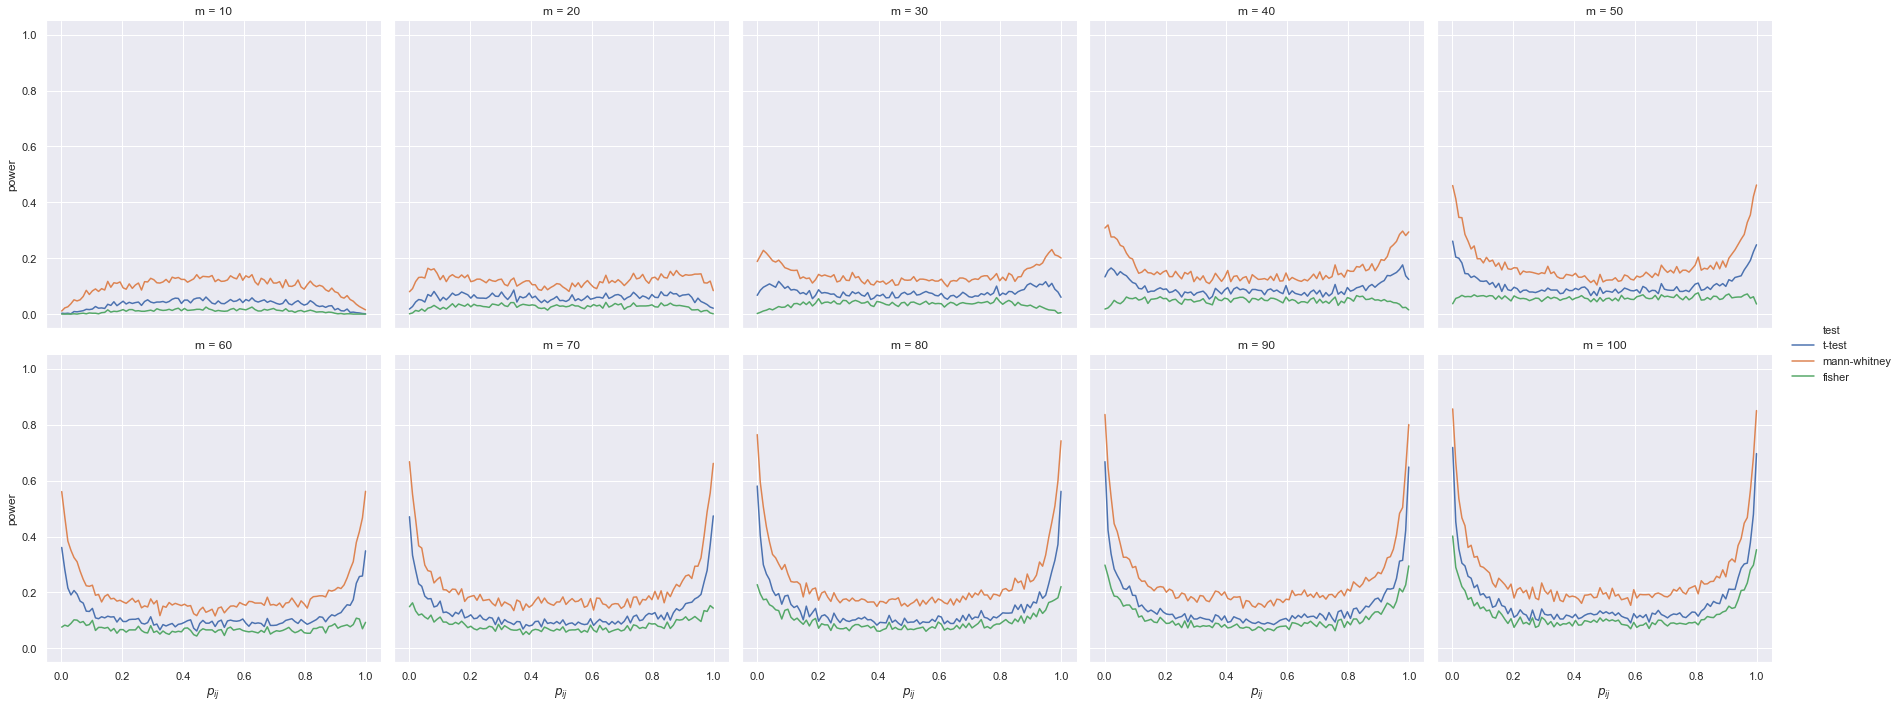

In [3]:
sns.set()

g = sns.relplot(
    x=r"$p_{ij}$",
    y="power",
    hue="test",
    col="m",
    col_wrap=5,
    data=df,
    legend="full",
    kind="line",
)

for ax in g.axes.flatten():
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)

plt.savefig("power.png", dpi=300)
plt.show()

## Sample size vs Type 1 Error

In [4]:
dfs = []

for file in glob.glob("results/type1/m*.csv"):
    
    # Get the sample size
    sample_size = re.split("[//m.]", file)[3]
    
    # Read csv and add sample_size as column
    df = pd.read_csv(file)
    df["m"] = int(sample_size)
    dfs.append(df)

# Combine dfs in to a single DataFrame
df = pd.concat(dfs)

# Organize the dataframe
df = df.sort_values(by=["m", "$p_{ij}$",])
df = df.drop("Unnamed: 0", axis=1)
df = df.reset_index(drop="True")

# Look at the final result
print(df.shape)
df.head()

(3000, 4)


,$p_{ij}$,test,type1,m
0,0.000000,t-test,0.0,10
1,0.000000,mann-whitney,0.0,10
2,0.000000,fisher,0.0,10
3,0.010101,t-test,0.0,10
4,0.010101,mann-whitney,0.0,10


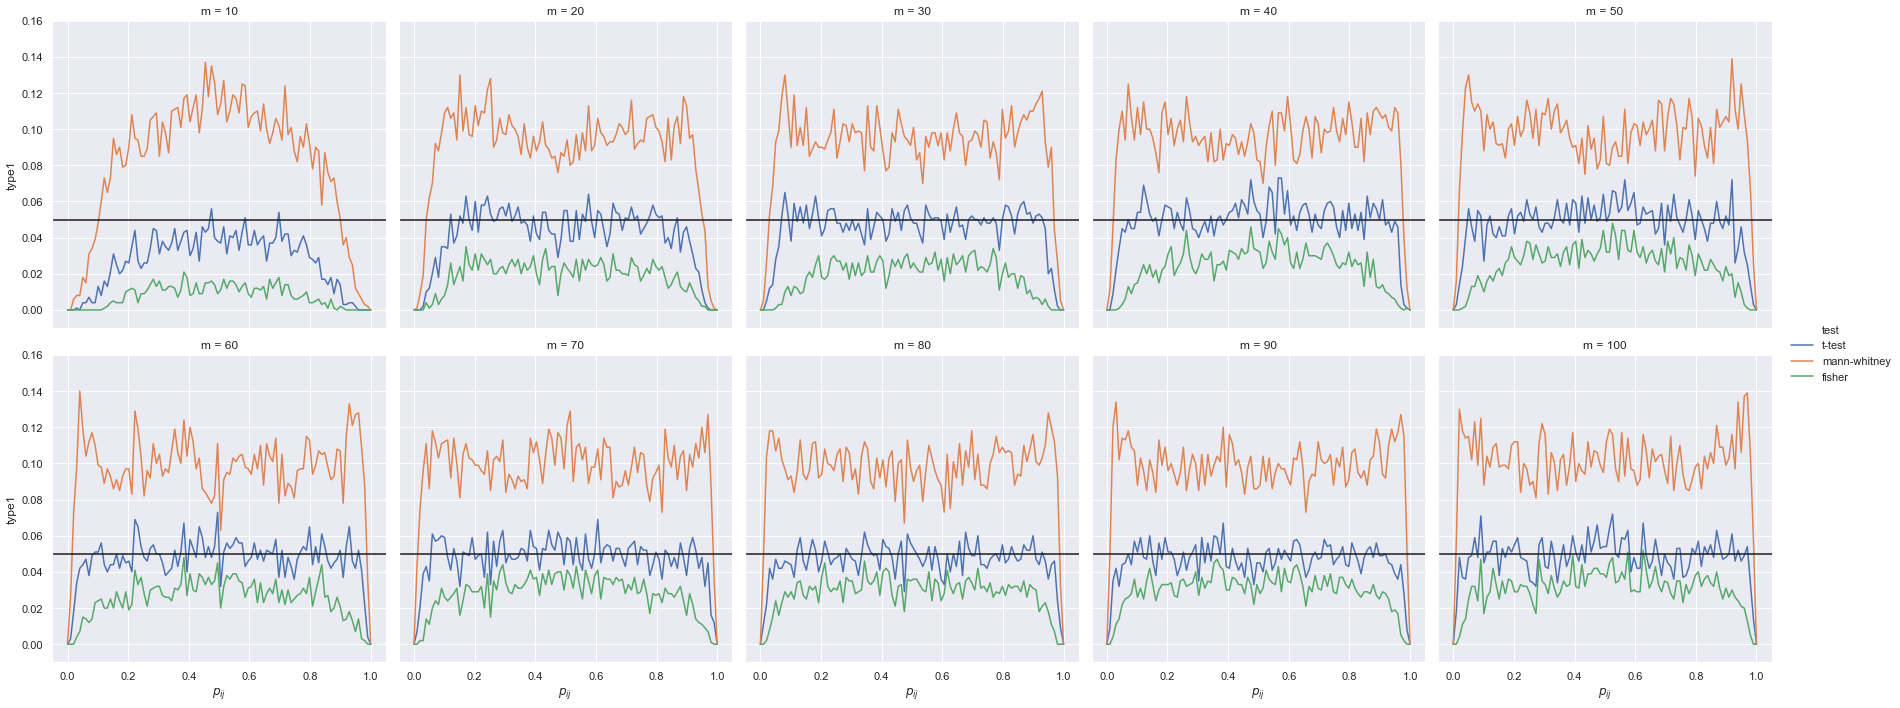

In [5]:
sns.set()

g = sns.relplot(
    x=r"$p_{ij}$",
    y="type1",
    hue="test",
    col="m",
    col_wrap=5,
    data=df,
    legend="full",
    kind="line",
)

for ax in g.axes.flatten():
    ax.axhline(0.05, color="k", label=r"$\alpha=0.05$")
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.01, 0.16)

plt.savefig("type1.png", dpi=300)
plt.show()